In [4]:
import seaborn as sns
sns.set_style("whitegrid")


In [100]:
genres = pd.DataFrame()
genres['im'] = numpy.mean(qomim,axis=0)
genres['jo'] = numpy.mean(qomjo,axis=0)
genres['sc'] = numpy.mean(qomsc,axis=0)
genres['vo'] = numpy.mean(qomvo,axis=0)
ax = sns.boxplot(x=genres)

In [101]:
procs = pd.DataFrame()
procs['norm'] = numpy.mean(qomnorm,axis = 0)
procs['syn'] = numpy.mean(qomsyn,axis = 0)
ax1 = sns.boxplot(x = procs)

<IPython.core.display.Javascript object>


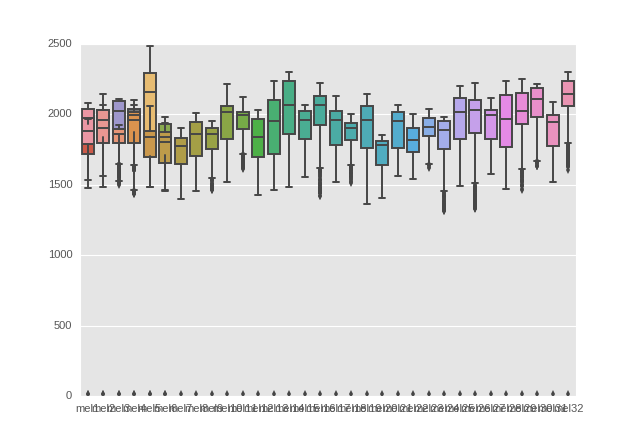

In [116]:
strats = pd.DataFrame()
strats['s1'] = numpy.mean(qoms1,axis=0)
strats['s2'] = numpy.mean(qoms2,axis=0)
strats['s3'] = numpy.mean(qoms3,axis=0)
strats['s4'] = numpy.mean(qoms4,axis=0)
strats['s5'] = numpy.mean(qoms5,axis=0)
strats['s6'] = numpy.mean(qoms6,axis=0)
ax2 = sns.boxplot(x=strats)

In [117]:
melodies = pd.DataFrame()
for i in range(1,33,1):
    melodies['mel'+str(i)] = numpy.mean(eval('m'+str(i)),axis=0)
    
ax3 = sns.boxplot(x = melodies)

In [349]:
%run dataext.py
%matplotlib notebook

In [80]:
h1, h2, h3, h4, h5,h6 =([] for i in range(6))
for i in range(1,7,1):
    s = 's'+str(i)
    h = 'h'+str(i)
    for j in range(len(eval(s))):
        eval(h).append(handdist(eval(s)[j]))
        
        

In [115]:
hdf = pd.DataFrame()
hdf['h1'] = numpy.mean(h1,axis=0)
hdf['h2'] = numpy.mean(h2,axis=0)
hdf['h3'] = numpy.mean(h3,axis=0)
hdf['h4'] = numpy.mean(h4,axis=0)
hdf['h5'] = numpy.mean(h5,axis=0)
hdf['h6'] = numpy.mean(h6,axis=0)
ax7=sns.boxplot(x=hdf)

<IPython.core.display.Javascript object>


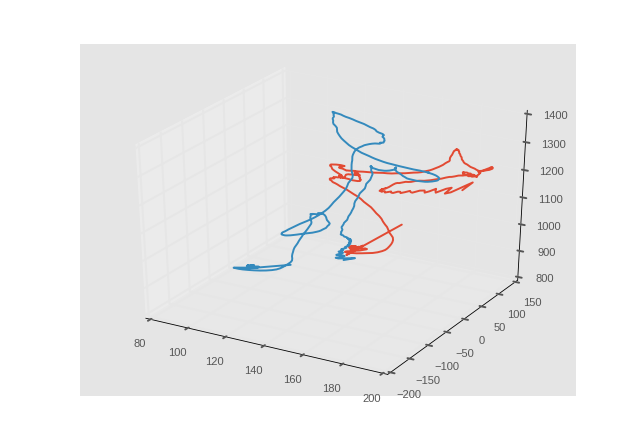

In [165]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


stri = '3_3_4'

x = pd.DataFrame.as_matrix(getlhrh(stri)['lh'])[:,0]
y = pd.DataFrame.as_matrix(getlhrh(stri)['lh'])[:,1]
z = pd.DataFrame.as_matrix(getlhrh(stri)['lh'])[:,2]

x1 = pd.DataFrame.as_matrix(getlhrh(stri)['rh'])[:,0]
y2 = pd.DataFrame.as_matrix(getlhrh(stri)['rh'])[:,1]
z3 = pd.DataFrame.as_matrix(getlhrh(stri)['rh'])[:,2]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x,y,z)
ax.plot(x1,y2,z3)

In [388]:
int(participants.loc[participants.index[int(partic)],['age']])

20

In [481]:
tracings = os.listdir('/home/tejaswik/Documents/CurrentProjects/melmot/data/normdatadump/')
for i in range(len(tracings)):
    tracings[i] = tracings[i][:-4]

im = [1,2,3,4,17,18,19,20]
jo = [5,6,7,8,21,22,23,24]
sc = [9,10,11,12,25,26,27,28]
vo = [13,14,15,16,29,30,31,32]
    
key, handstrat, participant, melody, sex, age, score, genre,proc, qoms, handdists, rz, lz  = ([] for i in range(13))
cols=['key', 'handstrat', 'participant', 'melody', 'sex', 'age', 'score', 'genre','proc', 'qom', 'handdist', 'rz', 'lz']

for i in range(len(tracings)):
    key.append(i)
    handstrat.append(returnDetails(tracings[i])['typeID'])
    partic = returnDetails(tracings[i])['partID']
    participant.append(partic)
    melID = returnDetails(tracings[i])['melID']
    melody.append(melID)
    sex.append(list(participants.loc[participants.index[int(partic)],['sex']])[0])
    age.append(int(participants.loc[participants.index[int(partic)],['age']]))
    score.append(int(participants.loc[participants.index[int(partic)],['scoreMus']]))
    qoms.append(qomnew(tracings[i]))
    handdists.append(handdist(tracings[i]))
    rz.append(readfile(tracings[i])['RHZ'])
    lz.append(readfile(tracings[i])['LHZ'])
    if int(melID) in im:
        genre.append('im')
    elif int(melID) in jo:
        genre.append('jo')
    elif int(melID) in sc:
        genre.append('sc')
    elif int(melID) in vo:
        genre.append('vo')
    if int(melID) <=16:
        proc.append('norm')
    elif int(melID) >=16:
        proc.append('syn')


In [482]:

for i in range(len(key)):
    dataset = pd.DataFrame(zip(key,handstrat,participant,melody,sex,age,score,genre,proc,qoms,handdists,rz,lz))
    dataset.columns=cols

<IPython.core.display.Javascript object>


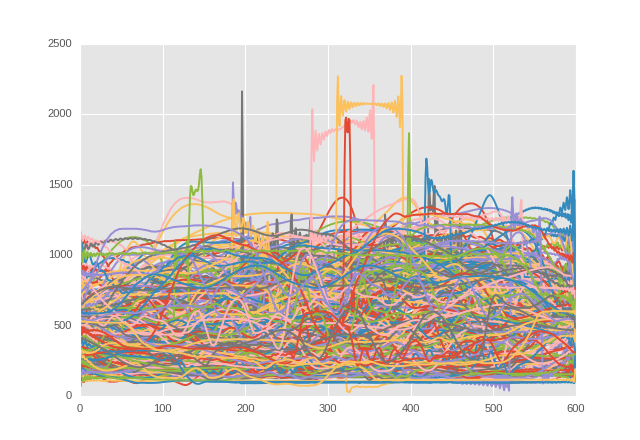

In [500]:
men =dataset[dataset['sex']=='M']
women = dataset[dataset['sex']=='F']


for key in men['key']:
    plt.plot(men['handdist'][key])
for key in women['key']:
    plt.plot(women['handdist'][key])
    